# Linear Regression Implementation Using functions and Libraries

## Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load dataset


In [ ]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    categorical_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    return df_encoded

# Manual Linear Regression using Normal Equation


In [ ]:
def manual_linear_regression(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

# Train and evaluate models


In [ ]:
def train_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # Manual implementation
    theta = manual_linear_regression(X_train, y_train)
    intercept_manual, coefficients_manual = theta[0], theta[1:]
    X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    y_pred_manual = X_test_b.dot(theta)
    mse_manual = mean_squared_error(y_test, y_pred_manual)
    r2_manual = r2_score(y_test, y_pred_manual)

    # Library-based implementation
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_lib = model.predict(X_test)
    mse_lib = mean_squared_error(y_test, y_pred_lib)
    r2_lib = r2_score(y_test, y_pred_lib)

    return model, intercept_manual, coefficients_manual, mse_manual, r2_manual, model.intercept_, model.coef_, mse_lib, r2_lib

# Extract and print model details

In [ ]:
def extract_model_details(intercept_manual, coefficients_manual, mse_manual, r2_manual, intercept_lib, coefficients_lib, mse_lib, r2_lib):
    print(f"Manual Implementation:\nIntercept: {intercept_manual}\nFirst 5 Coefficients: {coefficients_manual[:5]}\nMean Squared Error (MSE): {mse_manual}\nR² Score: {r2_manual}\n")
    print(f"Library Implementation (sklearn):\nIntercept: {intercept_lib}\nFirst 5 Coefficients: {coefficients_lib[:5]}\nMean Squared Error (MSE): {mse_lib}\nR² Score: {r2_lib}\n")

# Visualization


In [ ]:
def plot_results(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ideal Fit")
    plt.legend()
    plt.title("Linear Regression Predictions")
    plt.show()

# Predict house price based on area


In [ ]:
def predict_price_by_area(model, area_value):
    area_df = pd.DataFrame({"area": [area_value]})
    price_prediction = model.predict(area_df)[0]
    return price_prediction

# Main Execution


Manual Implementation:
Intercept: 2512254.26395934
First 5 Coefficients: [425.72984194]
Mean Squared Error (MSE): 3675286604768.187
R² Score: 0.2728785187197461

Library Implementation (sklearn):
Intercept: 2512254.2639593435
First 5 Coefficients: [425.72984194]
Mean Squared Error (MSE): 3675286604768.185
R² Score: 0.27287851871974644



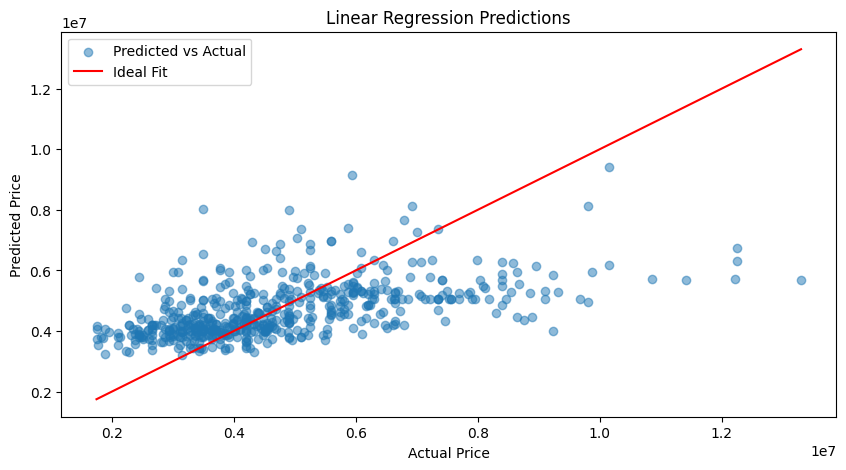

In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/DAV Experimets/Data Sheets/Housing.csv"
df_encoded = load_data(file_path)
X = df_encoded[["area"]]  # Using only area for prediction
y = df_encoded["price"]

model, intercept_manual, coefficients_manual, mse_manual, r2_manual, intercept_lib, coefficients_lib, mse_lib, r2_lib = train_models(X, y)
extract_model_details(intercept_manual, coefficients_manual, mse_manual, r2_manual, intercept_lib, coefficients_lib, mse_lib, r2_lib)
plot_results(y, model.predict(X))

# Predict house price for a given area


In [ ]:
area_value = 5000
predicted_price = predict_price_by_area(model, area_value)
print(f"Predicted price for area {area_value}: {predicted_price}")

Predicted price for area 5000: 4640903.473653258
